## 9.6 目标检测数据集（皮卡丘）

### 9.6.1 下载数据集

In [1]:
%matplotlib inline
import d2lzh as d2l
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

def _download_pikachu(data_dir):
    root_url = ('https://apache-mxnet.s3-accelerate.amazonaws.com/'
                'gluon/dataset/pikachu/')
    dataset = {'train.rec': 'e6bcb6ffba1ac04ff8a9b1115e650af56ee969c8',
               'train.idx': 'dcf7318b2602c06428b9988470c731621716c393',
               'val.rec': 'd6c33f799b4d058e82f2cb5bd9a976f69d72d520'}
    for k, v in dataset.items():
        fname = keras.utils.get_file(
            fname=k,
            cache_dir=data_dir,
            origin=root_url + k,
            extract=True,
            hash_algorithm='sha1',
            file_hash=v)

/usr/local/anaconda3/envs/rknn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/envs/rknn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/envs/rknn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/envs/rknn/lib/python3.6/site-packages

### 9.6.2 读取数据集
由于pikachu数据集是RecordIO格式，keras无法直接使用，本教程直接提供了还原后的数据图片，位于
/data/pikachu 目录

In [2]:
# data_dir = '../data/pikachu'
# _download_pikachu(data_dir)

### 9.6.2 读取数据集

In [3]:
def load_data_pikachu(batch_size, edge_size=256):  # edge_size：输出图像的宽和高
    data_dir = '../data/pikachu'
    data_train_img = data_dir + '/train/images/'
    #train_df = pd.read_json(data_dir + '/train/annotations.json')
    #val_df = pd.read_json(data_dir + '/val/annotations.json')
    
    with open(data_dir + '/train/annotations.json') as f:
        data_list = json.load(f)
        data = [[data_train_img +  data_list[d]['image'], [data_list[d]['class']] + data_list[d]['loc']] for d in data_list]
        train_df = pd.DataFrame(data, columns=['image', 'label'])
    
    with open(data_dir + '/val/annotations.json') as f:
        data_list = json.load(f)
        data = [[data_train_img +  data_list[d]['image'], [data_list[d]['class']] + data_list[d]['loc']] for d in data_list]
        val_df = pd.DataFrame(data, columns=['image', 'label'])
    
    train_gen = ImageDataGenerator()
    val_gen = ImageDataGenerator()
    
    train_iter = train_gen.flow_from_dataframe(
        dataframe=train_df,
        directory=None,
        x_col='image',
        y_col='label',
        class_mode='raw',
        batch_size = batch_size,
        target_size=(edge_size, edge_size),
        shuffle=True
    )
    
    val_iter = val_gen.flow_from_dataframe(
        dataframe=val_df,
        directory=None,
        x_col='image',
        y_col='label',
        class_mode='raw',
        batch_size = batch_size,
        target_size=(edge_size, edge_size),
    )

    return train_iter, val_iter

In [4]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_pikachu(batch_size, edge_size)
batch = train_iter.next()
batch[0].shape, batch[1].shape

Found 900 validated image filenames.
Found 100 validated image filenames.


((32, 256, 256, 3), (32,))

### 9.6.3 图示数据

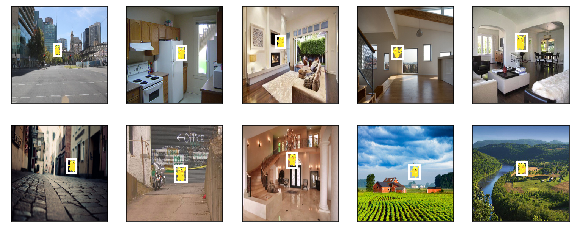

In [5]:
imgs = (batch[0][0:10]) / 255
axes = d2l.show_images(imgs, 2, 5).flatten()
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [np.array(label[1:5]) * edge_size], colors=['w'])